<p><img alt="Colaboratory logo" height="140px" src="https://svga.unac.edu.co/svga/images/logo-new.png" align="left" hspace="10px" vspace="0px"></p>

<h1> Analisis de datos 2</h1>

##Taller 
##Andres Felipe Quintero Luna
##       Hamirson Zamirt Barrera Rojas

A continuación cargaremos dos bases de datos con información referente a tarjetas de credito del mes 09 del 2017.

El archivo ESTADO_201709.txt tal que:

* ID:​ Nro. de identificación.
* Franquicia:​ A, B, C.
* Tipo Tarjeta:​ Representa el tipo de tarjeta.
* Número Tarjeta:​ Indica el número de la TC.
* Cupo Global:​ Indica el cupo de crédito que tiene la tarjeta.
* Disponible: Indica del cupo global cuanto tiene a ese corte disponible para realizar compras o avances.
* Fecha Emisión:​ Fecha en la que se compró la tarjeta.
* Fecha Ult Aumento Cupo: Fecha en la que se realizó el último aumento de cupo. Cuando está en 0 significa que nunca se ha realizado un aumento de cupo.
* Total Mes en Mora: Número de meses que ha estado en mora la TC (durante toda
la vida de la tarjeta).
*Altura de Mora: ​Indica la mora actual que tiene la TC. Viene en rango:
  ○ 0 No está en mora,
  ○ 30 está en mora hace menos de 30 días,
  ○ 60 está en mora hace menos de 60 días.
  ○ 90 está en mora hace menos de 90 días.
*Código Vendedor:​ Indica el código del vendedor que emitió la TC.
*Código Estado Tarjeta: Indica si la tarjeta está Activa o vigente (Codigo=0) y código = 1 (indica que la tarjeta está cancelada por el cliente).

Y el archivo TRANSACCION_201709.txt, tal que:

* ID:​ Nro de identificación.
* Número Tarjeta:​ Indica el número de la TC que realizó la transacción.
* Fecha de transacción​: Indica la fecha en que se realizó la transacción.
* Codigo Transacción:
  ○ AV : AVANCE
  ○ AB: ABONO
  ○ CN: COMPRA NACIONAL
  ○ CI: COMPRA INTERNAL
  ○ CM: CUOTA DE MANEJO.
* Valor Transacción:​ Indica el valor de la transacción.
* Numero Cuotas Diferidas: Indica el número de cuotas en el que el cliente desea pagar la compra.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/'
dfE = pd.read_csv(path+'ESTADO_201709.txt', delimiter="|")
dfT = pd.read_csv(path+'TRANSACCION_201709.txt', delimiter="|")

### Responda
1. Imprima cada uno de los datasets para ver sus columnas
2. Use el método merge para combinar los datasets  en el `NUMERO TARJETA' y haciendo la intersección.
3. Busque los datos faltantes y determine una estrategia adecuada par su llenado.
4. Convierta todas las fechas al fomato adecuado
5. Genere un histograma de cada columna para ver su distribución
6. Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?
7. Realice un bineo del total de meses en mora partiendolos en  tres categorías: 'baja mora','media mora','alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta?.
8. Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?.

Recuerde hacer un analisis exploratorio de sus datos para familiarizarse con los datos antes de comenzar el análisis.

*PUNTO* 1 Imprima cada uno de los datasets para ver sus columnas

In [3]:
dfE

,ID,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA
0,829,A,AZUL,768,NaN,1300000.00,20110802,0,24,0,21096,0
1,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0
2,7543,A,NaN,835,4400000.0,2213516.22,20120508,20140611,2,0,12950,0
3,4346,A,AZUL,1495,3300000.0,3220423.13,20030220,20110322,8,0,2555,0
4,568,A,AZUL,443,5250000.0,2739226.37,20081107,20170604,22,0,12832,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9201,6020,C,C PLATINUM,9081,17250000.0,2807607.11,20111020,20170605,0,0,10569,0
9202,6420,C,C PLATINUM,9152,15000000.0,12984899.86,20140926,0,0,0,31068,0
9203,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0
9204,5495,C,C PLATINUM,9123,42000000.0,42000000.00,19930901,0,1,0,0,0


In [4]:
dfT

,ID,NUMERO TARJETA,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
0,1,1682,20170915,AB,137373.0,0
1,1,1682,20170923,CN,14500.0,1
2,1,1682,20170929,CM,17340.0,0
3,2,6338,20170915,AB,508999.0,0
4,2,6338,20170923,CN,170000.0,1
...,...,...,...,...,...,...
25438,9181,7343,20170921,CN,13000.0,1
25439,9181,7343,20170921,CN,27800.0,1
25440,9181,7343,20170921,CN,89900.0,1
25441,9181,7343,20170921,CN,219600.0,1


*PUNTO* 2 Use el método merge para combinar los datasets en el `NUMERO TARJETA' y haciendo la intersección.

In [5]:
dfET = pd.merge(dfE, dfT, on="NUMERO TARJETA", how="inner")

In [6]:
dfET

,ID_x,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA,ID_y,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
0,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170904,CN,17000.0,1
1,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170904,AB,98741.0,0
2,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170912,CN,112800.0,3
3,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170912,CN,112800.0,3
4,3983,A,AZUL,1776,NaN,2033824.21,20120606,20170604,0,0,26757,0,3983,20170920,CN,93004.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25440,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0,6842,20170911,CN,120000.0,1
25441,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0,6842,20170911,CN,188000.0,1
25442,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0,6842,20170911,CN,205000.0,1
25443,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0,6842,20170911,CN,263100.0,1


*PUNTO* 3. Busque los datos faltantes y determine una estrategia adecuada para su llenado.

In [7]:
dfET.isnull().sum()

ID_x                        0
FRANQUICIA                  0
TIPO TARJETA               91
NUMERO TARJETA              0
CUPO GLOBAL                12
DISPONIBLE                  0
FECHA DE EMISION            0
FECHA ULT AUMENTO CUPO      0
TOTAL MES EN MORA           0
ALTURA DE MORA              0
CODIGO VENDEDOR             0
CODIGO ESTADO TARJETA       0
ID_y                        0
FECHA DE TRANSACCION        0
CODIGO TRANSACCION          4
VALOR TRANSACCION           0
NUMERO CUOTAS DIFERIDAS     0
dtype: int64

In [8]:
#dada la forma como están organizados los datos en la columna 'TIPO TARJETA', lo más lógico es llenarlo con ffill
dfET["TIPO TARJETA"].fillna(method='ffill', inplace= True)
# al solo haber 4 entradas sin codigo de transacción podemos eliminarlas sin afectar la estadística
dfET.dropna(subset=['CODIGO TRANSACCION'],inplace=True)
#llenaremos el cupo con la media ya que es una variable continua
dfET['CUPO GLOBAL'].fillna((dfET['CUPO GLOBAL'].mean()),inplace=True) 
dfET.isnull().sum()

ID_x                       0
FRANQUICIA                 0
TIPO TARJETA               0
NUMERO TARJETA             0
CUPO GLOBAL                0
DISPONIBLE                 0
FECHA DE EMISION           0
FECHA ULT AUMENTO CUPO     0
TOTAL MES EN MORA          0
ALTURA DE MORA             0
CODIGO VENDEDOR            0
CODIGO ESTADO TARJETA      0
ID_y                       0
FECHA DE TRANSACCION       0
CODIGO TRANSACCION         0
VALOR TRANSACCION          0
NUMERO CUOTAS DIFERIDAS    0
dtype: int64

*PUNTO* 4 Convierta todas las fechas al fomato adecuado

In [9]:
dfET['FECHA DE EMISION'] = pd.to_datetime(dfET['FECHA DE EMISION'].astype(str),format='%Y%m%d') 
dfET['FECHA DE TRANSACCION'] = pd.to_datetime(dfET['FECHA DE TRANSACCION'].astype(str),format='%Y%m%d')
#para la fecha de último aumento de cupo debemos tener cuidado con los datos marcados en 0
fechas_aumento = []
for x in dfET['FECHA ULT AUMENTO CUPO']:
    if x != 0:
        fechas_aumento.append(pd.to_datetime(str(x),format='%Y%m%d'))
    else:
        fechas_aumento.append(0)
dfET['FECHA ULT AUMENTO CUPO'] = fechas_aumento

In [10]:
dfET

,ID_x,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA,ID_y,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
0,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,2017-06-04 00:00:00,0,0,26757,0,3983,2017-09-04,CN,17000.0,1
1,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,2017-06-04 00:00:00,0,0,26757,0,3983,2017-09-04,AB,98741.0,0
2,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,2017-06-04 00:00:00,0,0,26757,0,3983,2017-09-12,CN,112800.0,3
3,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,2017-06-04 00:00:00,0,0,26757,0,3983,2017-09-12,CN,112800.0,3
4,3983,A,AZUL,1776,6.164071e+06,2033824.21,2012-06-06,2017-06-04 00:00:00,0,0,26757,0,3983,2017-09-20,CN,93004.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25440,6842,C,C PLATINUM,9051,1.000000e+07,9918650.37,2017-06-18,0,0,0,10998,0,6842,2017-09-11,CN,120000.0,1
25441,6842,C,C PLATINUM,9051,1.000000e+07,9918650.37,2017-06-18,0,0,0,10998,0,6842,2017-09-11,CN,188000.0,1
25442,6842,C,C PLATINUM,9051,1.000000e+07,9918650.37,2017-06-18,0,0,0,10998,0,6842,2017-09-11,CN,205000.0,1
25443,6842,C,C PLATINUM,9051,1.000000e+07,9918650.37,2017-06-18,0,0,0,10998,0,6842,2017-09-11,CN,263100.0,1


*PUNTO* 5 Genere un histograma de cada columna para ver su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10a0b455d0>,
      dtype=object)

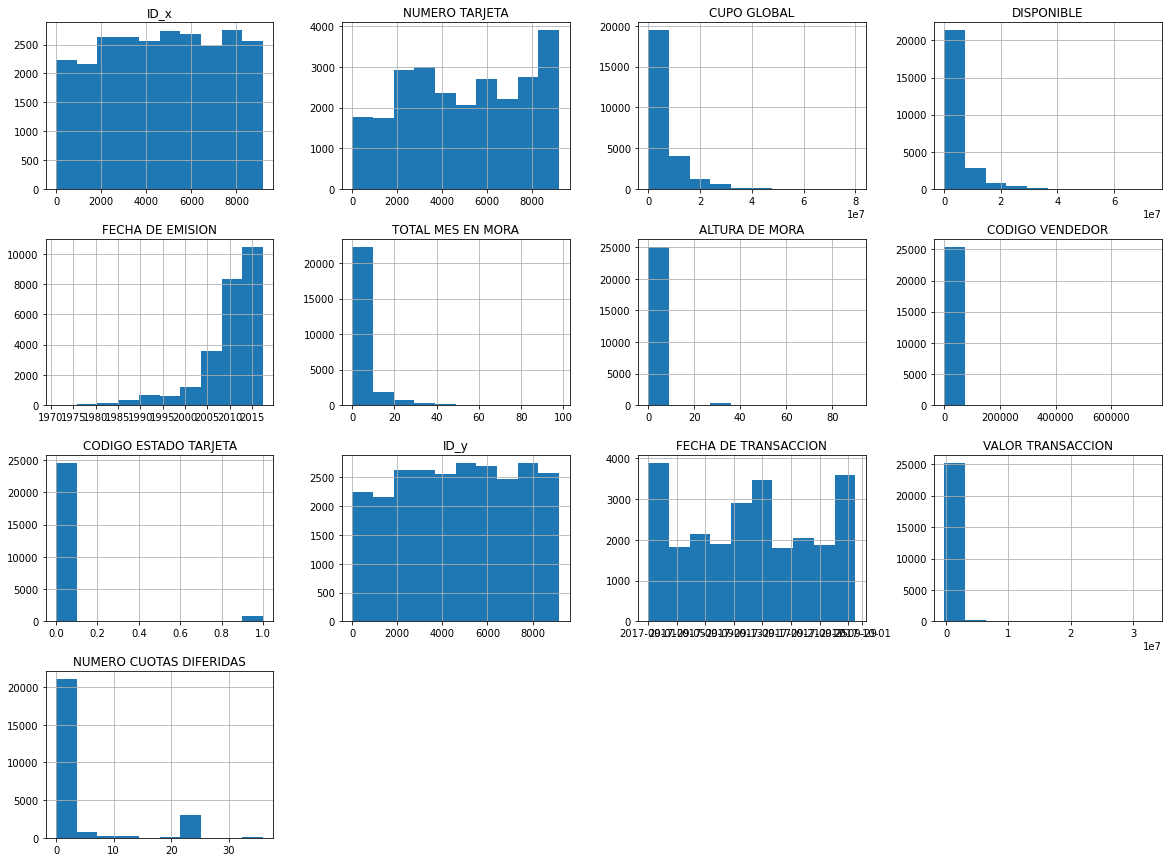

In [11]:
dfET.hist(figsize=(20,15))

*Punto* 6 Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?

R: Si solo contamos con los datos que tenemos actualmente, se puede considerar que no exite una relacion entre el tipo de tarjeta y la cancelacion, ya que sin importar realmente el tipo de tarjeta, esta es totalmente independiente del estado de cancelacion de la misma, ya que no se dan motivos claros del porque de la misma.
Pero si nos vamos mas alla, podemos revisar con la muestra del promedio de cupo global de la tarjeta misma, donde combinandolo con esta informacion, se puede realmente ver el como dependiendo de este mismo dato, es mas rentable para las personas cancelar su suscripcion a esa tarjeta y moverse a la misma, incluso el porque en algunas tarjetas tienen tan pocos estados activos, ya que cuentan con un indice o muy bajo o muy alto, pero a su vez, no es rentable para todo el mundo el poder obtenerlas, solo en casos muy especificos.

In [12]:
dfET.groupby(['TIPO TARJETA', 'CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})

CODIGO ESTADO TARJETA
                                                          count
TIPO TARJETA        CODIGO ESTADO TARJETA                      
 C                  0                                        24
                    1                                         3
AZUL                0                                      3857
                    1                                       195
B CLASICA           0                                       381
                    1                                        24
B DORADA            0                                       470
                    1                                         3
C CLASICA           0                                      1736
                    1                                        68
C PLATINUM          0                                      1504
                    1                                        11
CLASICA C           0                                      2972
                    1                                       109
CLASICA TRADICIONAL 0                                      3838
                    1                                       217
E-CARD              0                                       143
                    1                                         9
IDEAL               0                                      1204
                    1                                        83
ORO                 0                                      1409
                    1                                        15
ORO C               0                                      1271
                    1                                        17
ORO EXITO           0                                       238
ORO TRADICIONAL     0                                      1967
                    1                                        54
PLATINUM            0                                      1052
                    1                                         6
PLATINUM C          0                                       234
VERDE               0                                      2225
                    1                                       102

In [13]:
#dfET.groupby(['TIPO TARJETA','CODIGO ESTADO TARJETA']).agg({'CUPO GLOBAL':['mean']})

*Punto* 7 Realice un bineo del total de meses en mora partiendolos en tres categorías: 'baja mora','media mora','alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta?.

R: Si, ya que con lo visto anteriormente, dependiendo de la mora y su relacion con la tarjeta, se puede definir si es rentable para la persona el mantenerse en la misma o no, viendolo desde otra perspectica, cuando la mora tienen un estado de solides bajo, se puede confirmar que aunque haya muchas tarjetas activas relacionadas con la misma, estas se cancelan de gran manera, ya que no sale rentable para las personas y hasta terminan perdiendo, mientras que cuando la mora esta en una medida mas estable o alta, se puede mantener y no hay necesidad de ninguna perdida para la persona ni la cancelacion de la tarjeta.

In [14]:
dfET['MES MORA DISCR'] = pd.cut(dfET['TOTAL MES EN MORA'],bins=3,labels=['baja mora','media mora','alta mora']) 
dfET.groupby(['MES MORA DISCR','CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})

CODIGO ESTADO TARJETA
                                                     count
MES MORA DISCR CODIGO ESTADO TARJETA                      
baja mora      0                                     24091
               1                                       909
media mora     0                                       409
               1                                         7
alta mora      0                                        25
               1                                         0

*PUNTO* 8 Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?.

R: Si, ya que este mismo es el que define los beneficios y las perdidas que pueda contener la misma tarjeta, como al momento de ver el cupo global de la tarjeta, esta puede ser un beneficio para la persona o una perdida para la misma, siendo este la principal causa de que la tarjeta siga en estado activo o sea cancelada por lo mismo.

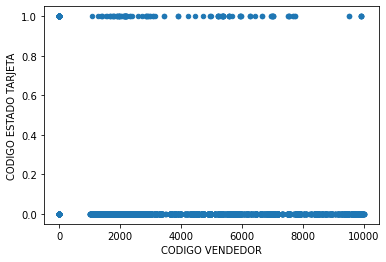

In [15]:
#dfET.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')

#tenemos un dato atípico, aplicamos un filtro para eliminarlo

dfET['CODIGO VENDEDOR']=dfET[dfET['CODIGO VENDEDOR']<10000]['CODIGO VENDEDOR']
dfET.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')